<a href="https://colab.research.google.com/github/pedrowillianprestes/sigmoidal_data_science/blob/main/Analisando_os_Dados_do_Airbnb_(Lisboa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Lisboa

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Lisboa (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/portugal/lisbon/lisbon/2022-09-13/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://www.dropbox.com/s/15i4eztx1uef09a/lisboa.csv?dl=1) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("https://www.dropbox.com/s/15i4eztx1uef09a/lisboa.csv?dl=1")


## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.697500,-9.197680,Entire home/apt,69,3,44,2022-08-09,0.45,1,195,15,NaN
1,36664873,Casa Ferry Holiday House Lisbon 15min & Beach ...,275575455,Joana,Lisboa,Belm,38.671280,-9.230640,Entire home/apt,95,2,21,2022-09-03,0.56,1,72,8,42622/AL
2,25345952,"La maison de la plage, et de la tranquillité",175971197,Ramiro,Lourinh,Lourinh e Atalaia,39.306640,-9.337600,Entire home/apt,65,5,37,2022-08-18,0.89,2,269,16,Exempt
3,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,54,2,166,2022-09-11,1.62,1,304,45,56539/AL.
4,28283003,Apartamento no Coração da Aldeia/ Flat to Rent,213594711,Jorge,Lourinh,Lourinh e Atalaia,39.308548,-9.338993,Entire home/apt,59,3,12,2022-08-29,0.27,3,170,5,84329/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.
Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 19651
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* As variáveis `reviews_per_month` , `last_review` e `license` têm aproximadamente 1% dos valores nulos.
* As variáveis `name` têm aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.098417
last_review                       0.098417
license                           0.069309
name                              0.000407
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

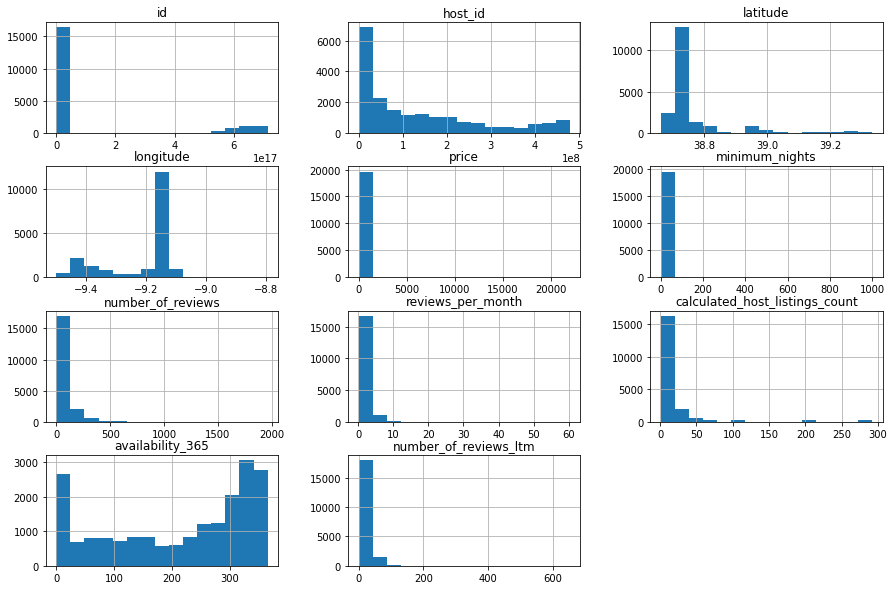

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

####Resumo estatístico

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19651.000000,19651.000000,19651.000000,17717.000000,19651.000000,19651.000000
mean,142.822197,3.979899,54.666124,1.507802,16.245229,211.683070
std,298.507221,15.534765,82.187743,1.515960,41.784592,124.981629
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,5.000000,0.430000,1.000000,96.000000
50%,100.000000,2.000000,21.000000,1.070000,4.000000,255.000000
75%,152.000000,3.000000,69.000000,2.170000,13.000000,323.000000
max,22000.000000,1000.000000,1961.000000,60.390000,292.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 152, porém seu valor máximo é 22000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para price

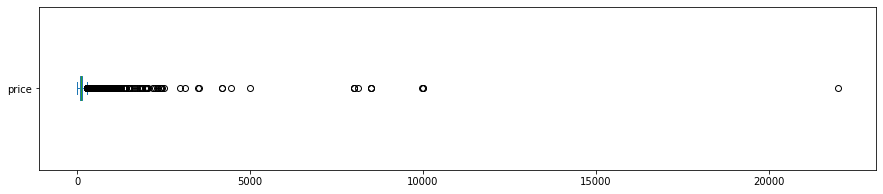

price: valores acima de 800
192 entradas
0.9770%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 800 para price
print("price: valores acima de 800")
print("{} entradas".format(len(df[df.price > 800])))
print("{:.4f}%".format((len(df[df.price > 800]) / df.shape[0])*100))

#### Boxplot para minimum_nights

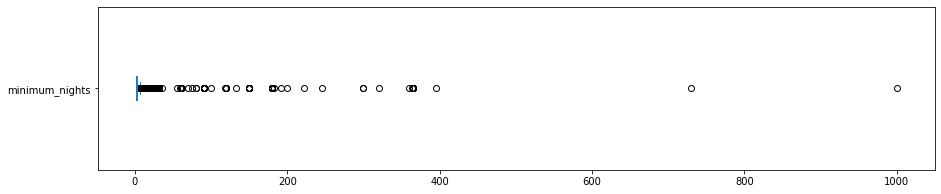

minimum_nights: valores acima de 30 dias:
198 entradas
1.0076%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

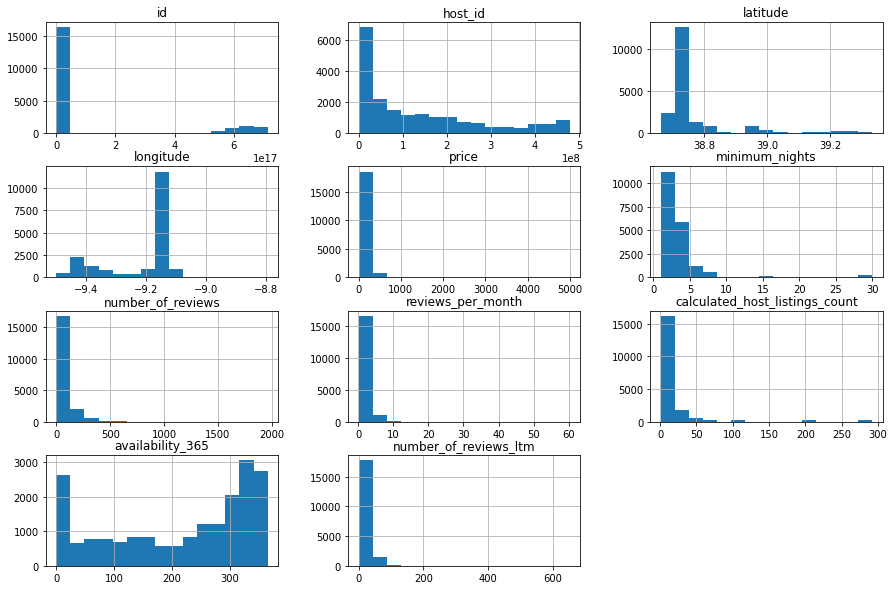

In [23]:
# remover os *outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 5000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)


# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));


Depois da análise feita acima, observou-se que é necessário excluir os *outliers*. Sendo assim, após a exclusão dos mesmos é possível ter um valor com uma acurácia maior, ou seja, um valor que se aproxima do valor real.

In [ ]:
# ver a média da coluna `price``

print('O preço médio é de {} Euros'.format(df_clean.price.mean()))
print('A mediana do preço é {} Euros'.format(df_clean.price.median()))
print('A moda do preço é {} Euros'.format(df_clean.price.mode()[0]))

O preço médio é de 126.52006437211234 Euros
A mediana do preço é 100.0 Euros
A moda do preço é 80 Euros


### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.047826,-0.097409,-0.072172,0.061250,0.085838
minimum_nights,-0.047826,1.000000,-0.089221,-0.154942,-0.078106,-0.068662
number_of_reviews,-0.097409,-0.089221,1.000000,0.547753,-0.082975,0.006031
reviews_per_month,-0.072172,-0.154942,0.547753,1.000000,-0.048434,0.102667
calculated_host_listings_count,0.061250,-0.078106,-0.082975,-0.048434,1.000000,0.056464
availability_365,0.085838,-0.068662,0.006031,0.102667,0.056464,1.000000


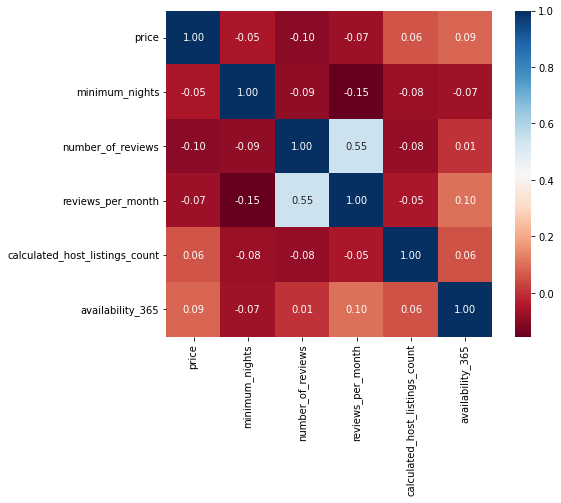

In [ ]:
# plotar um heatmap a partir das correlações
fig= plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já utilizou-se do serviço, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14840
Private room        4040
Hotel room           252
Shared room          226
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / len(df_clean)

Entire home/apt    0.766608
Private room       0.208699
Hotel room         0.013018
Shared room        0.011675
Name: room_type, dtype: float64

A saída do comando nos mostra a porcetagem dos imóveis, em que:

**76%** casa ou apartamento;

**20%** quartos individuais;

**0.1%** quartos compartilhados;

o restante dos imóveis são quartos de hotéis.



O imóvel do tipo apartamento/casa (Entire home/apt) é o mais ofertado no Airbnb para a cidade de Lisboa, representando cerca de 76% das propriedades do dataset.

O segundo tipo de imóvel mais ofertado é o quarto privativo (Private room), representando cerca de 20%.

### **Q7. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

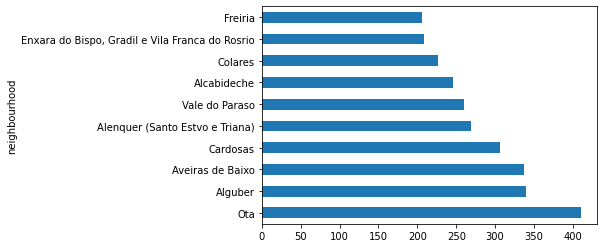

In [24]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='barh');

Acima, vemos que o bairro de Ota, Alguber e Aveiras de Baixo está com média de preço superior a de lugares como Santo António, Misericórdia.

Uma pessoa que não conhecesse Lisboa poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Ota.

In [20]:
# ver quantidade de imóveis no Lousa
print(df_clean[df_clean.neighbourhood == "Ota"].shape)

# Vamos ver somente uma entrada para a localidade de Ota
df_clean[df_clean.neighbourhood == "Ota"]

(1, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3208,11957708,"Oak Villa, Ota, Portugal",46445798,Rute,Alenquer,Ota,39.10988,-8.98853,Entire home/apt,410,7,3,2017-10-28,0.04,7,255,0,NaN


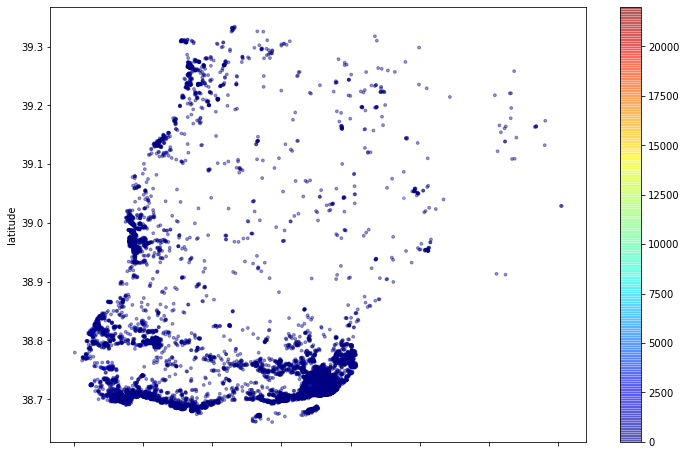

In [22]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Por fim, vamos avaliar a média de noites em Lisboa.

In [25]:
# ver a média da coluna `minimum_nights``
print("A média do mínimo de noites é aproximadamente",round(df_clean['minimum_nights'].mean(),0))

A média do mínimo de noites é aproximadamente 3.0


A média de noites é de aproximadamente 3 dias.

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Após a fase de tratamento de dados, foi possível concluir que o aluguel de um imóvel custa em média 126 euros e de noites para reservar a propriedade é de 3 dias. Tipo de imóvel mais ofertado é do tipo apartamento/casa.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.